In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage


In [ ]:
def generate_indoor_scene(width, height):
    """
    Generates a 2D binary numpy array mimicking an indoor scene.

    Args:
        width (int): The width of the scene array.
        height (int): The height of the scene array.

    Returns:
        numpy.ndarray: A 2D binary array representing the indoor scene.
    """
    scene = np.zeros((height, width), dtype=int)

    # 1. Create Walls (Perimeter)
    scene[0, :] = 1  # Top wall
    scene[height - 1, :] = 1  # Bottom wall
    scene[:, 0] = 1  # Left wall
    scene[:, width - 1] = 1  # Right wall

    # 2. Add some "Furniture" (Examples)
    # A rectangular table/bed in the center
    table_width = int(width * 0.3)
    table_height = int(height * 0.2)
    table_start_x = (width - table_width) // 2
    table_start_y = (height - table_height) // 2
    scene[table_start_y : table_start_y + table_height,
          table_start_x : table_start_x + table_width] = 1

    # A smaller "rug" or "coffee table"
    rug_width = int(width * 0.15)
    rug_height = int(height * 0.1)
    rug_start_x = int(width * 0.6)
    rug_start_y = int(height * 0.7)
    scene[rug_start_y : rug_start_y + rug_height,
          rug_start_x : rug_start_x + rug_width] = 1

    # A "doorway" (a gap in a wall) - let's make a gap in the top wall
    door_start = width // 3
    door_end = door_start + (width // 5)
    scene[0, door_start:door_end] = 0

    # A "window" (another gap, perhaps in a side wall)
    window_start = height // 4
    window_end = window_start + (height // 4)
    scene[window_start:window_end, width - 1] = 0


    # Add a "cabinet" or "bookshelf" in a corner
    cabinet_width = int(width * 0.1)
    cabinet_height = int(height * 0.3)
    scene[1:1 + cabinet_height, 1:1 + cabinet_width] = 1

    # Add a "chair"
    chair_size = 3
    scene[height - chair_size - 2 : height - 2,
          width - chair_size - 2 : width - 2] = 1


    return scene



    

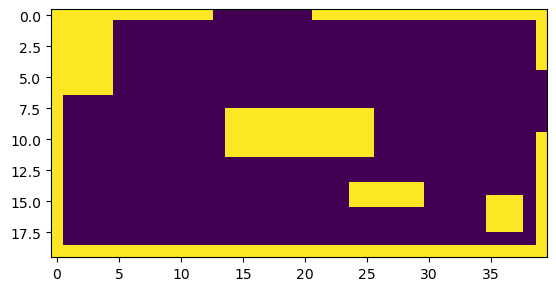

In [8]:
scene_width = 40
scene_height = 20
indoor_scene = generate_indoor_scene(scene_width, scene_height)
plt.imshow(indoor_scene)
plt.show()

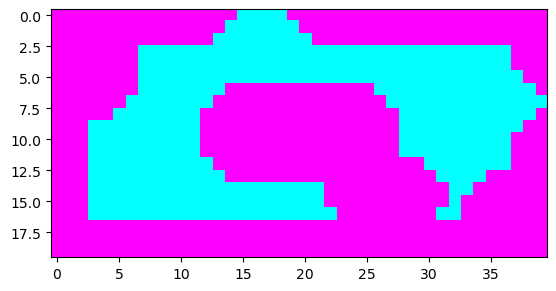

In [ ]:
selem = skimage.morphology.disk(3)
traversible = skimage.morphology.binary_dilation(
                        indoor_scene, footprint=selem
                        ) 

plt.imshow(traversible, cmap='cool')
plt.show()
